In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('hardness_dataset.csv')

print("Dataset head:\n", df.head())

Dataset head:
      material  Formula CrystalSystem   bulk  shear   young  poisson  Hexp
0       mp-66  Diamond         cubic  435.3  520.5  1116.5     0.07  96.0
1    mp-30148     BC2N  orthorhombic  361.0  422.7   912.1     0.08  76.0
2   mp-629458     BC2N  orthorhombic  361.6  409.0   891.1     0.09  76.0
3  mp-1018649    c-BC5      trigonal  405.8  378.2   865.6     0.14  71.0
4     mp-1639       BN         cubic  408.0  374.5   860.2     0.15  63.0



Random Forest Regression Performance:
Mean Squared Error (MSE): 23.8744
Mean Absolute Error (MAE): 2.9381
Root Mean Squared Error (RMSE): 4.8861
R² Score: 0.8902


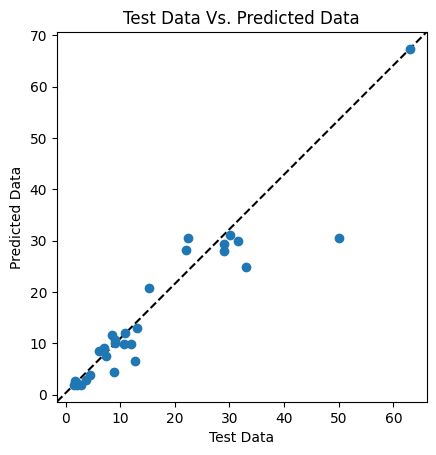


k-Nearest Neighbors Regression Performance:
Mean Squared Error (MSE): 21.7998
Mean Absolute Error (MAE): 2.8345
Root Mean Squared Error (RMSE): 4.6690
R² Score: 0.8998


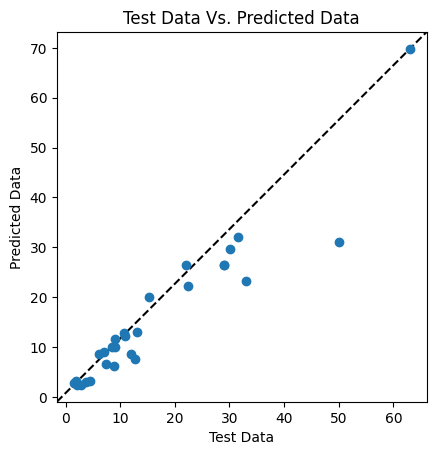


Linear Regression Performance:
Mean Squared Error (MSE): 20.5110
Mean Absolute Error (MAE): 3.3029
Root Mean Squared Error (RMSE): 4.5289
R² Score: 0.9057


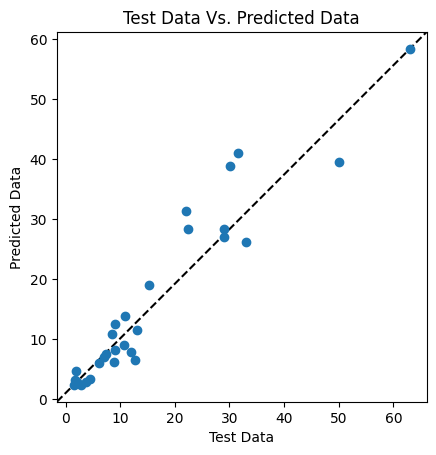

In [21]:
# 2(a)
# Split data into features and target variable
X = df[['bulk', 'shear', 'young', 'poisson']]
y = df['Hexp']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

    f, ax = plt.subplots()
    plt.scatter(y_test, y_pred,color="C0")
    ax.set_box_aspect(aspect=1)
    # ax.set_xlim(0,650000)
    # ax.set_ylim(0,650000)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="k", ls="--", zorder = 0)
    plt.xlabel('Test Data') 
    plt.ylabel('Predicted Data') 
    plt.title('Test Data Vs. Predicted Data') 
    plt.show()
    
    return mse, mae, rmse, r2

# Initialize models

rf = RandomForestRegressor(random_state=42)
knn = KNeighborsRegressor()
lr = LinearRegression()


# Train and evaluate Random Forest Regression
rf.fit(X_train, y_train)
rf_metrics = evaluate_model(rf, X_test, y_test, "Random Forest Regression")

# Train and evaluate k-Nearest Neighbors Regression
knn.fit(X_train_scaled, y_train)
knn_metrics = evaluate_model(knn, X_test_scaled, y_test, "k-Nearest Neighbors Regression")

# Train and evaluate Linear Regression
lr.fit(X_train, y_train)
lr_metrics = evaluate_model(lr, X_test, y_test, "Linear Regression")

# Determine the best model based on the evaluation metric (e.g., RMSE or R² score)
models_metrics = {
    "Random Forest": rf_metrics,
    "k-NN": knn_metrics,
    "Linear Regression": lr_metrics
}

In [22]:
# Cross-validation function
def cross_validate_model(model, X, y, model_name="Model", cv=5):
    # Perform cross-validation
    mse_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

    # Calculate mean and standard deviation for each metric
    mse_mean, mse_std = mse_scores.mean(), mse_scores.std()
    mae_mean, mae_std = mae_scores.mean(), mae_scores.std()
    r2_mean, r2_std = r2_scores.mean(), r2_scores.std()

    print(f"\n{model_name} Cross-Validation Performance:")
    print(f"Mean Squared Error (MSE): {mse_mean:.4f} ± {mse_std:.4f}")
    print(f"Mean Absolute Error (MAE): {mae_mean:.4f} ± {mae_std:.4f}")
    print(f"R² Score: {r2_mean:.4f} ± {r2_std:.4f}")

    return mse_mean, mae_mean, r2_mean

# Perform cross-validation for each model
rf_cv_metrics = cross_validate_model(rf, X_train, y_train, "Random Forest Regression")
knn_cv_metrics = cross_validate_model(knn, X_train_scaled, y_train, "k-Nearest Neighbors Regression")
lr_cv_metrics = cross_validate_model(lr, X_train, y_train, "Linear Regression")

# Store cross-validation metrics in a dictionary
models_cv_metrics = {
    "Random Forest": rf_cv_metrics,
    "k-NN": knn_cv_metrics,
    "Linear Regression": lr_cv_metrics
}


Random Forest Regression Cross-Validation Performance:
Mean Squared Error (MSE): 25.8010 ± 11.3261
Mean Absolute Error (MAE): 3.1800 ± 0.7239
R² Score: 0.8978 ± 0.0175

k-Nearest Neighbors Regression Cross-Validation Performance:
Mean Squared Error (MSE): 31.3491 ± 25.1878
Mean Absolute Error (MAE): 3.2272 ± 0.8006
R² Score: 0.8829 ± 0.0478

Linear Regression Cross-Validation Performance:
Mean Squared Error (MSE): 15.4675 ± 3.2476
Mean Absolute Error (MAE): 2.8394 ± 0.4324
R² Score: 0.9211 ± 0.0408


In [23]:
# Choose the best model based on R² score
best_model_name = max(models_metrics, key=lambda k: models_metrics[k][3])  # R² score is the 4th metric
best_model_metrics = models_metrics[best_model_name]

print(f"\nBest Model: {best_model_name}")
print("Metrics (MSE, MAE, RMSE, R²):", best_model_metrics)


Best Model: Linear Regression
Metrics (MSE, MAE, RMSE, R²): (20.511014235597987, 3.3029074465241512, 4.528908724582334, 0.9056963109850497)


In [24]:
# 2(b)
import pandas as pd
import numpy as np


# Calculate hardness values using the four equations for each data point
df['H1'] = 0.0607 * df['young']
df['H2'] =( 0.1769 * df['shear']) - 2.899 
df['H3'] = ((1 - 2 * df['poisson']) * df['bulk']) / (6 * (1 + df['poisson']))
df['H4'] = 2 * (((df['shear'] / df['bulk']) ** 2 * df['shear']) ** 0.585) - 3

# Calculate absolute errors with respect to experimental hardness (Hexp)
df['Error_H1'] = abs(df['Hexp'] - df['H1'])
df['Error_H2'] = abs(df['Hexp'] - df['H2'])
df['Error_H3'] = abs(df['Hexp'] - df['H3'])
df['Error_H4'] = abs(df['Hexp'] - df['H4'])

def closest_value(row):
    a_value = row['Hexp']
    differences = {col: abs(a_value - row[col]) for col in ['H1', 'H2', 'H3','H4']}
    # Find the column with the minimum difference and return its value
    closest_col = min(differences, key=differences.get)
    closest_val = row[closest_col]
    return closest_val, closest_col
# Find the equation with the minimum error for each row
df[['Best_H', 'target']] = df.apply(lambda row: pd.Series(closest_value(row)), axis=1)

average_error_H1 = df['Error_H1'].mean()
average_error_H2 = df['Error_H2'].mean()
average_error_H3 = df['Error_H3'].mean()
average_error_H4 = df['Error_H4'].mean()

# Identify the best equation on average based on lowest average error
average_errors = {'H1': average_error_H1, 'H2': average_error_H2, 'H3': average_error_H3, 'H4': average_error_H4}
best_equation_avg = min(average_errors, key=average_errors.get)


print(df.head(10))

# Display results
print("Average Errors for Each Equation:")
print(f"H1: {average_error_H1:.4f}")
print(f"H2: {average_error_H2:.4f}")
print(f"H3: {average_error_H3:.4f}")
print(f"H4: {average_error_H4:.4f}")
print(f"\nBest Equation: {best_equation_avg}")

     material  Formula CrystalSystem   bulk  shear   young  poisson  Hexp  \
0       mp-66  Diamond         cubic  435.3  520.5  1116.5     0.07  96.0   
1    mp-30148     BC2N  orthorhombic  361.0  422.7   912.1     0.08  76.0   
2   mp-629458     BC2N  orthorhombic  361.6  409.0   891.1     0.09  76.0   
3  mp-1018649    c-BC5      trigonal  405.8  378.2   865.6     0.14  71.0   
4     mp-1639       BN         cubic  408.0  374.5   860.2     0.15  63.0   
5     mp-1346      B6O      trigonal  226.9  207.7   477.4     0.15  35.0   
6      mp-160        B      trigonal  211.3  200.1   456.3     0.14  35.0   
7     mp-8062      SiC         cubic  211.3  187.0   433.0     0.16  34.0   
8    mp-10142    Ta3B4  orthorhombic  296.0  208.0   505.5     0.22  33.0   
9     mp-1479       BP         cubic  160.3  162.4   364.2     0.12  33.0   

         H1        H2         H3         H4  Error_H1  Error_H2   Error_H3  \
0  67.77155  89.17745  58.311215  92.711835  28.22845   6.82255  37.688785

In [28]:
# C)
# Import necessary libraries

X = df[['bulk', 'shear', 'young', 'poisson']]
Y = df['target']  # Target variable

# Split the data into training and test sets (80% train, 20% test)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, Y, test_size=0.2)

# Standardize the features for models that benefit from scaling
scaler = StandardScaler()
X_train_scaled_class = scaler.fit_transform(X_train_class)
X_test_scaled_class = scaler.transform(X_test_class)

# Define a function to evaluate classification model performance
def evaluate_classification_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score (weighted): {f1:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    return accuracy, f1

# Initialize classification models
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
knn_clf = KNeighborsClassifier()

# Train and evaluate Logistic Regression
log_reg.fit(X_train_scaled_class, y_train_class)
log_reg_metrics = evaluate_classification_model(log_reg, X_test_scaled_class, y_test_class, "Logistic Regression")

# Train and evaluate Random Forest Classifier
rf_clf.fit(X_train_scaled_class, y_train_class)
rf_metrics = evaluate_classification_model(rf_clf,  X_test_scaled_class, y_test_class, "Random Forest Classifier")

from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators' : [50,60,70,80],
    'max_depth' : [2,3,4,5]
                              
}


# Setup GridSearchCV with RF and the parameter grid
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, verbose=1)

# Fit the model
grid_search_rf.fit(X_train_scaled_class, y_train_class.values.ravel())

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_
rf_hyperparametertuning_metrics = evaluate_classification_model(best_model_rf, X_test_scaled_class, y_test_class, "Random Forest Classifier(After hyper parameter tuning)")

# Train and evaluate k-Nearest Neighbors Classifier
knn_clf.fit(X_train_scaled_class, y_train_class)
knn_metrics = evaluate_classification_model(knn_clf, X_test_scaled_class, y_test_class, "k-Nearest Neighbors Classifier")

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],      # Number of neighbors
    'weights': ['uniform', 'distance'],    # Weighting of neighbors
   
}



# Setup GridSearchCV with KNN and the parameter grid
grid_search_knn = GridSearchCV(estimator=knn_clf, param_grid=param_grid_knn, cv=5, verbose=1)

# Fit the model
grid_search_knn.fit(X_train_scaled_class, y_train_class.values.ravel())

# Get the best hyperparameters
best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_
knn_hyperparametertuning_metrics = evaluate_classification_model(best_model_knn, X_test_scaled_class, y_test_class, "k-Nearest Neighbors(After hyper parameter tuning)")

# Determine the best model based on F1 Score
models_metrics = {
    "Logistic Regression": log_reg_metrics,
    "Random Forest": rf_metrics,
    "Random Forest Classifier(After hyper parameter tuning)": rf_hyperparametertuning_metrics,
    "k-Nearest Neighbors": knn_metrics,
    "k-Nearest Neighbors(After hyper parameter tuning)": knn_hyperparametertuning_metrics,
}





Logistic Regression Performance:
Accuracy: 0.3103
F1 Score (weighted): 0.2360
Classification Report:
               precision    recall  f1-score   support

          H1       0.29      0.57      0.38         7
          H2       0.00      0.00      0.00         8
          H3       0.29      0.67      0.40         6
          H4       1.00      0.12      0.22         8

    accuracy                           0.31        29
   macro avg       0.39      0.34      0.25        29
weighted avg       0.40      0.31      0.24        29


Random Forest Classifier Performance:
Accuracy: 0.3793
F1 Score (weighted): 0.3485
Classification Report:
               precision    recall  f1-score   support

          H1       0.27      0.43      0.33         7
          H2       0.25      0.12      0.17         8
          H3       0.45      0.83      0.59         6
          H4       0.67      0.25      0.36         8

    accuracy                           0.38        29
   macro avg       0.41     

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Random Forest Classifier(After hyper parameter tuning) Performance:
Accuracy: 0.4483
F1 Score (weighted): 0.3973
Classification Report:
               precision    recall  f1-score   support

          H1       0.40      0.57      0.47         7
          H2       0.50      0.12      0.20         8
          H3       0.40      1.00      0.57         6
          H4       1.00      0.25      0.40         8

    accuracy                           0.45        29
   macro avg       0.57      0.49      0.41        29
weighted avg       0.59      0.45      0.40        29


k-Nearest Neighbors Classifier Performance:
Accuracy: 0.4483
F1 Score (weighted): 0.3969
Classification Report:
               precision    recall  f1-score   support

          H1       0.33      0.57      0.42         7
          H2       0.40      0.25      0.31         8
          H3       0.60      1.00      0.75         6
          H4       0.50      0.12      0.20         8

    accuracy                           0.

In [29]:
# Select the best model based on F1 score
best_model_name = max(models_metrics, key=lambda k: models_metrics[k][1])  
best_model_metrics = models_metrics[best_model_name]

print(f"\nBest Model: {best_model_name}")
print("Metrics (Accuracy, F1 Score):", best_model_metrics)


Best Model: k-Nearest Neighbors(After hyper parameter tuning)
Metrics (Accuracy, F1 Score): (0.5517241379310345, 0.542528735632184)
